<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/temperatura_max_analise_CAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**Analyzing the Average Maximum Temperature**
**Analisando a média da Temperatura Máxima**<font>

---


Importing the Data
---

In [1]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing the packages 
import pandas as pd
import numpy as np
import chardet
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

**Reading CSV**

In [3]:
file_path ='/content/drive/MyDrive/Data_Lake/temperatura_preciptacao/'
tipo = 'tasmax_'
anos ='1901_2020_'
pais = "CAN"

file = f"{tipo}{anos}{pais}.csv"

In [4]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [5]:
arquivo = f"{tipo}{pais}"
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as arquivo :
  df_tasmax = pd.read_csv(arquivo)

 
**DataFrame**

In [6]:
df_tasmax

,tasmax,Year,Statistics,Country,ISO3
0,-20.6,1901,Jan Average,Canada,CAN
1,-19.6,1901,Feb Average,Canada,CAN
2,-13.7,1901,Mar Average,Canada,CAN
3,-4.8,1901,Apr Average,Canada,CAN
4,4.9,1901,May Average,Canada,CAN
...,...,...,...,...,...
1435,14.6,2020,Aug Average,Canada,CAN
1436,7.8,2020,Sep Average,Canada,CAN
1437,-1.9,2020,Oct Average,Canada,CAN
1438,-10.3,2020,Nov Average,Canada,CAN


In [7]:
#Dataframe size
df_tasmax.shape

(1440, 5)

In [8]:
#Dataframe informations
df_tasmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tasmax       1440 non-null   float64
 1    Year        1440 non-null   int64  
 2    Statistics  1440 non-null   object 
 3    Country     1440 non-null   object 
 4    ISO3        1440 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [9]:
#identifying coluns's names
df_tasmax.columns

Index(['tasmax', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [10]:
#cleaning columns names
colunas = [c.strip().lower().replace(" ","_") for c in df_tasmax.columns]
df_tasmax.columns = colunas
   

df_tasmax.head(5)

,tasmax,year,statistics,country,iso3
0,-20.6,1901,Jan Average,Canada,CAN
1,-19.6,1901,Feb Average,Canada,CAN
2,-13.7,1901,Mar Average,Canada,CAN
3,-4.8,1901,Apr Average,Canada,CAN
4,4.9,1901,May Average,Canada,CAN


In [11]:
#checking columns' names after modifications
df_tasmax.columns

Index(['tasmax', 'year', 'statistics', 'country', 'iso3'], dtype='object')

In [12]:
#defining a function to replace values inside the index column 
def replace (col): 
    return col.replace(" Average",'').strip()

In [13]:
 #creating a dict to redefining some columns' names
 renomeando = {'statistics':'month'}

In [14]:
#defining a function to create a conditional new column
def year_season(row):
    seasons = {"spring":["Mar","Apr","May"], 'summer':["Jun","Jul","Aug"],'autumn':['Sep',"Oct","Nov"],'winter':["Dec","Jan","Feb"]}
    key_list = list(seasons.keys())
    val_list = list(seasons.values())
    for meses in seasons.values():
        for m in meses:
            if m == row['month']:
                indice =val_list.index(meses)
                #print(indice,meses)
                #print(key_list[indice])
                return key_list[indice]

In [15]:
#Filtering years from 1960 onwards, cleaning and renaming columns
df_tasmax_test_season=\
(
    df_tasmax.loc[df_tasmax['year']>=1960,:]
    .rename(columns=renomeando)
    .set_index("month")
    .rename(index=replace)
    .reset_index()
    
    
)

df_tasmax_test_season.loc[::,['country','iso3']]=df_tasmax_test_season.loc[::,['country','iso3']].applymap(lambda x: x.strip())

df_tasmax_test_season.head()

,month,tasmax,year,country,iso3
0,Jan,-19.4,1960,Canada,CAN
1,Feb,-16.0,1960,Canada,CAN
2,Mar,-16.2,1960,Canada,CAN
3,Apr,-5.3,1960,Canada,CAN
4,May,5.3,1960,Canada,CAN


In [16]:
df_tasmax_test_season.iloc[0,3]

'Canada'

In [17]:
df_tasmax_test_season.loc[::,['country','iso3']].applymap(lambda x: x.strip())
df_tasmax_test_season.country.apply(lambda x: x.strip()).iloc[0]


'Canada'

In [18]:
#df_tasmax_test_season['country'].str.strip()
#df_tasmax_test_season['country'].apply(lambda x: x.strip())

In [19]:
#Including the conditional column: season
df_tasmax_season =df_tasmax_test_season.assign(season = df_tasmax_test_season.apply(year_season,axis=1))



In [20]:
df_tasmax_season

,month,tasmax,year,country,iso3,season
0,Jan,-19.4,1960,Canada,CAN,winter
1,Feb,-16.0,1960,Canada,CAN,winter
2,Mar,-16.2,1960,Canada,CAN,spring
3,Apr,-5.3,1960,Canada,CAN,spring
4,May,5.3,1960,Canada,CAN,spring
...,...,...,...,...,...,...
727,Aug,14.6,2020,Canada,CAN,summer
728,Sep,7.8,2020,Canada,CAN,autumn
729,Oct,-1.9,2020,Canada,CAN,autumn
730,Nov,-10.3,2020,Canada,CAN,autumn


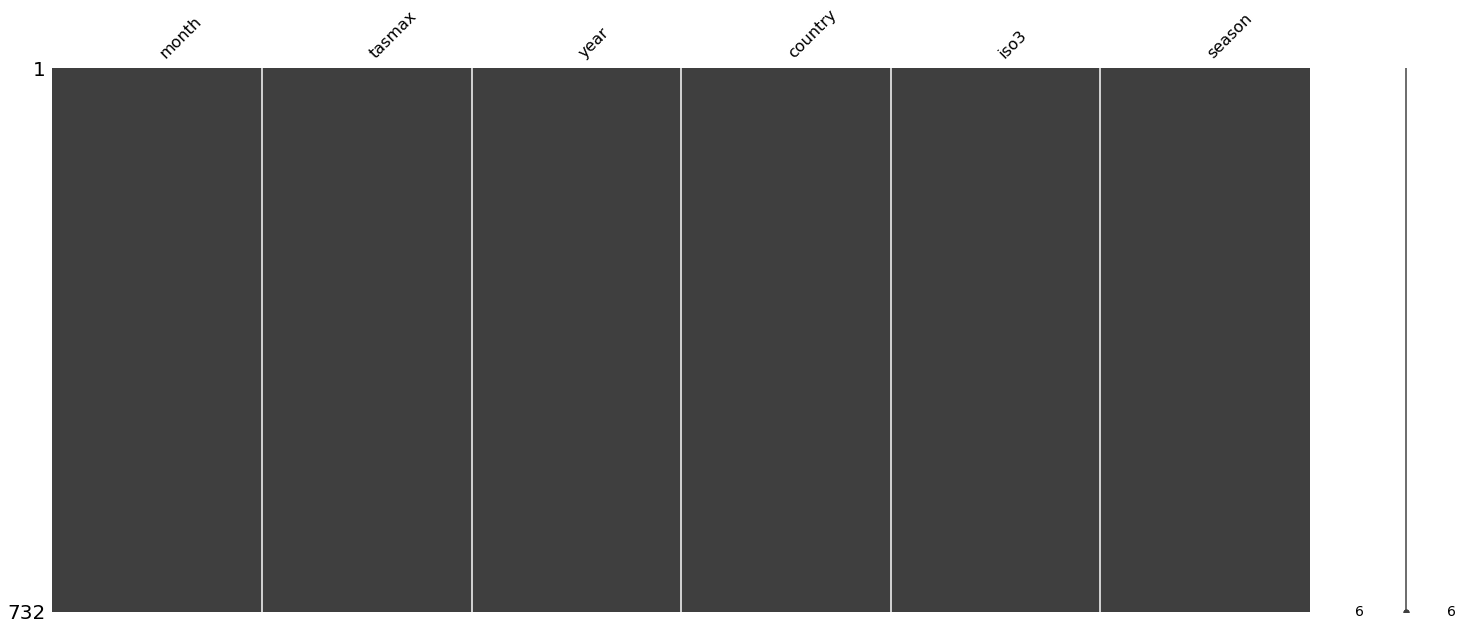

In [21]:
#Verifying NAN values
msno.matrix(df_tasmax_season)

In [22]:
df_tasmax_season.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/limpos/tasmax_temperatura_max_avg/{tipo}{anos}{pais}_seasons.csv", index=False)

**Improving the memory usage**

---

In [23]:
#Verifying the shape
df_tasmax_season.shape


(732, 6)

In [24]:
#Verifying types and memory usage
original_info = df_tasmax_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    732 non-null    object 
 1   tasmax   732 non-null    float64
 2   year     732 non-null    int64  
 3   country  732 non-null    object 
 4   iso3     732 non-null    object 
 5   season   732 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.4+ KB


In [25]:
#Verifying memory usage
original_mem = df_tasmax_season.memory_usage(deep=True)


In [26]:
#Checking the low cardinality
df_tasmax_season.select_dtypes(include=["object"]).nunique()

month      12
country     1
iso3        1
season      4
dtype: int64

In [27]:
#Changing the columns types
col_to_category = ['month',"country","iso3","season"]

df_tasmax_season["year"]= df_tasmax_season["year"].astype("int32")
df_tasmax_season[col_to_category]=df_tasmax_season[col_to_category].astype("category")

df_tasmax_season

,month,tasmax,year,country,iso3,season
0,Jan,-19.4,1960,Canada,CAN,winter
1,Feb,-16.0,1960,Canada,CAN,winter
2,Mar,-16.2,1960,Canada,CAN,spring
3,Apr,-5.3,1960,Canada,CAN,spring
4,May,5.3,1960,Canada,CAN,spring
...,...,...,...,...,...,...
727,Aug,14.6,2020,Canada,CAN,summer
728,Sep,7.8,2020,Canada,CAN,autumn
729,Oct,-1.9,2020,Canada,CAN,autumn
730,Nov,-10.3,2020,Canada,CAN,autumn


Comparing Memory Usage

In [28]:
#Verifying new memory usage
new_memory = df_tasmax_season.memory_usage(deep=True)


In [29]:
# Comparying memory usage
old_value ='\033[91m'
new_value ='\033[1;32m'
normal_value = '\033[0m'
print(old_value + "This is the original memory usage" + normal_value)
print(original_mem)
print(new_value + "\nAnd this is the new memory usage" + normal_value)
print(new_memory)


This is the original memory usage
Index        128
month      43920
tasmax      5856
year        5856
country    46116
iso3       43920
season     46116
dtype: int64

And this is the new memory usage
Index       128
month      1772
tasmax     5856
year       2928
country     875
iso3        872
season     1144
dtype: int64


In [30]:
#Checking new info data
new_info = df_tasmax_season.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   month    732 non-null    category
 1   tasmax   732 non-null    float64 
 2   year     732 non-null    int32   
 3   country  732 non-null    category
 4   iso3     732 non-null    category
 5   season   732 non-null    category
dtypes: category(4), float64(1), int32(1)
memory usage: 12.3 KB


In [31]:
#Checking the describe method
df_tasmax_season['tasmax'].describe().T

count    732.000000
mean      -2.225683
std       12.743367
min      -25.800000
25%      -14.600000
50%       -2.250000
75%       10.150000
max       18.000000
Name: tasmax, dtype: float64

*PLOTTING YEARS*

In [32]:
#Defining the df to chart
df_tasmax_season_chart =\
(
    df_tasmax_season.set_index("month")
)

df_tasmax_season_chart

,tasmax,year,country,iso3,season
month,,,,,
Jan,-19.4,1960,Canada,CAN,winter
Feb,-16.0,1960,Canada,CAN,winter
Mar,-16.2,1960,Canada,CAN,spring
Apr,-5.3,1960,Canada,CAN,spring
May,5.3,1960,Canada,CAN,spring
...,...,...,...,...,...
Aug,14.6,2020,Canada,CAN,summer
Sep,7.8,2020,Canada,CAN,autumn
Oct,-1.9,2020,Canada,CAN,autumn


In [33]:
#Importing the package and defining the colors to plot
import matplotlib.dates as mdt
blue = '#99ddee'
white = '#ffffff'

In [34]:
#Defining the plot's function
def plot_year(ax,temp,years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    filtro_1 = df_tasmax_season_chart.year == y
    ax.plot(df_tasmax_season_chart.index[filtro_1],df_tasmax_season_chart.loc[filtro_1,'tasmax'].values)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Celsius Max Temperature', color=white)
    ax.set_title(f"Year {y}", color=white, fontweight='bold')
    ax.fill_between(df_tasmax_season_chart.index,min(df_tasmax_season_chart['tasmax']), max(df_tasmax_season_chart['tasmax'])+5,  facecolor='white' )


In [35]:
df_tasmax_season_chart_x = df_tasmax_season_chart.reset_index()

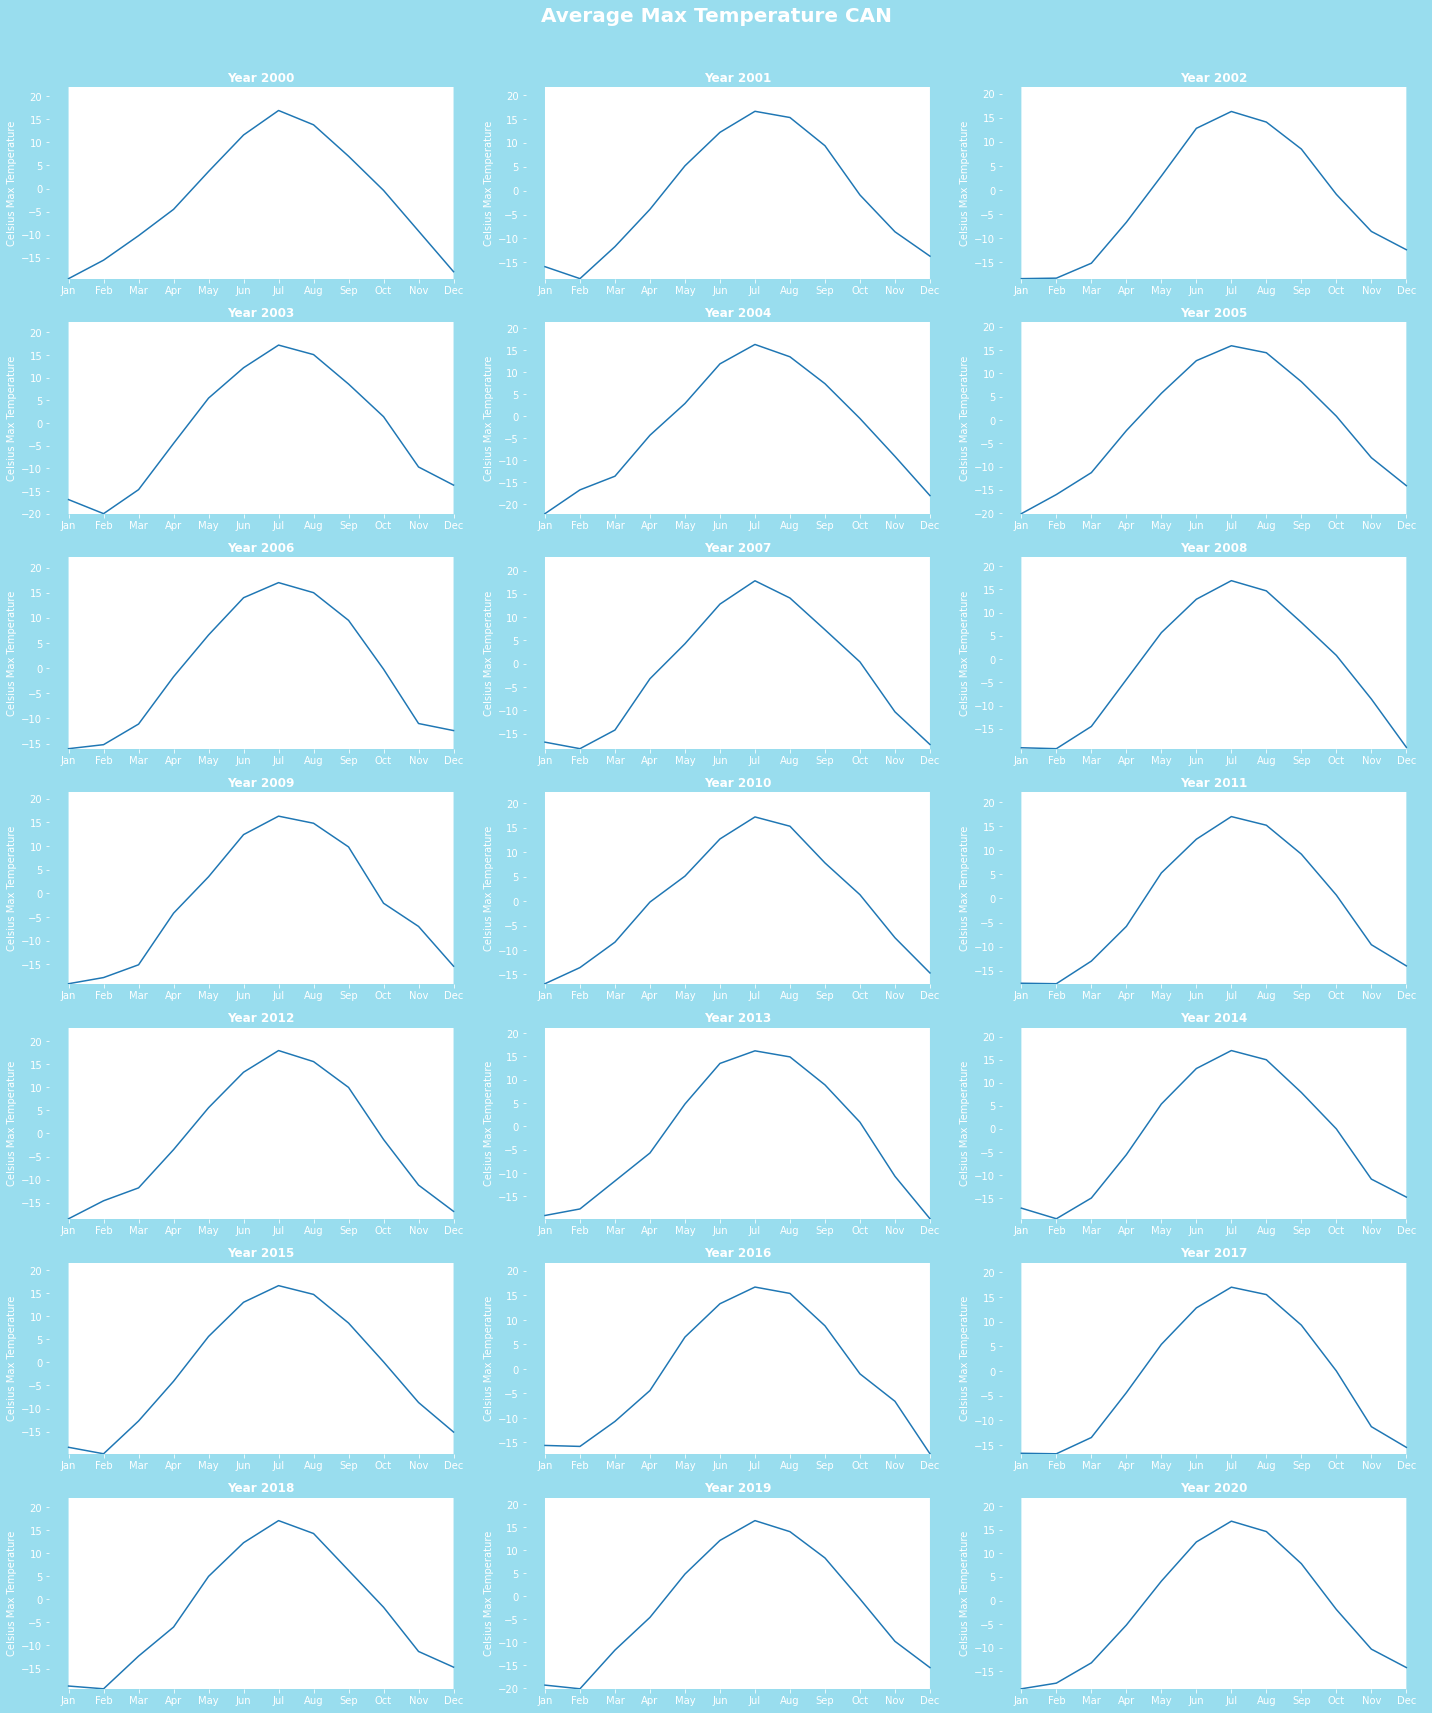

In [36]:
#Ploting the years
years = range(2000,2020+1)
fig, axs = plt.subplots(ncols =3, nrows = int(len(years)/3),figsize=(20,25), linewidth = 5, facecolor = blue)

axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):

    ax= axs[i]
 
    data_1=\
    (
        df_tasmax_season_chart_x.assign(YEAR=pd.to_datetime(df_tasmax_season_chart_x.year))
        .set_index("year")
        .loc[y]
        .tasmax
        .interpolate()  
    )
 

    if max_val is None or max_val < data_1.max():
        max_val = data_1.max()
        max_data = data_1
        max_ax = ax

    ax.set_ylim(min(data_1.values), max((data_1.values))+5)
    years = {y}
    plot_year(ax, data_1, years)


fig.suptitle(f'Average Max Temperature {pais}', color='white', fontweight='bold',fontsize=20 )
fig.tight_layout( rect= [0,0.03, 1, 0.95])
fig.savefig(f'/content/drive/MyDrive/Temperatura_Precipitacao_analises/charts/tasmax_temperatura_max_media/Average Max Temperature by Year {pais}.png', dpi=300, facecolor=blue)



*PLOTTING QUARTILES*

In [37]:
#Defining data to Seasons' Quartile
temp_season = ['tasmax','season']
df_temp_season= df_tasmax_season[temp_season]


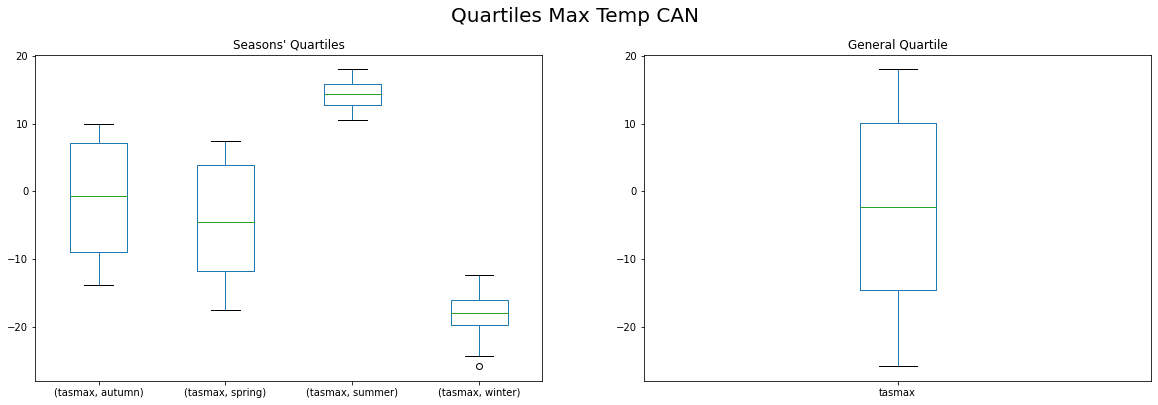

In [38]:
#Ploting Quartiles
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
fig.suptitle(f"Quartiles Max Temp {pais}", size=20, y=0.99)
df_temp_season.pivot(columns='season').plot.box(ax=ax1,title="Seasons' Quartiles")
df_tasmax_season['tasmax'].plot.box(ax=ax2, title="General Quartile")
fig.savefig(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/charts/tasmax_temperatura_max_media/{pais} Seasons'Quartiles")

In [39]:
country=df_tasmax_season_chart.iloc[0,2]


In [40]:
iso3=df_tasmax_season_chart.iloc[0,3]


In [41]:
iso3

'CAN'

In [42]:
country

'Canada'

In [43]:
#Defining data to General Quartile
general_quartile= df_tasmax_season['tasmax'].describe()[['min','25%','50%','75%','max']].round(2).to_frame().assign(country=country).assign(iso3=iso3)
general_quartile.index.name='quartil'
general_quartile

,tasmax,country,iso3
quartil,,,
min,-25.80,Canada,CAN
25%,-14.60,Canada,CAN
50%,-2.25,Canada,CAN
75%,10.15,Canada,CAN
max,18.00,Canada,CAN


In [44]:
general_quartile.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/notebooks/Quartiles/Temp_max_AVG/{pais}_General_Quartile.csv")

In [45]:
seasons_quartiles=\
(
    df_temp_season.pivot(columns='season')
    .describe()
    .loc[['min','25%','50%','75%',"max"]]
    .round(2)
    
    
)

#quartil_temp_seasons.columns=quartil_temp_seasons.columns.droplevel()
seasons_quartiles

tasmax                     
season autumn spring summer winter
min     -13.9 -17.60   10.6 -25.80
25%      -8.9 -11.70   12.8 -19.75
50%      -0.7  -4.50   14.4 -18.00
75%       7.1   3.95   15.9 -16.05
max      10.0   7.40   18.0 -12.40

In [46]:
seasons_quartiles.columns=\
(
    seasons_quartiles.columns.droplevel().add_categories(['country','iso3'])
       
)
seasons_quartiles=seasons_quartiles.assign(country=country).assign(iso3=iso3)
seasons_quartiles.index.name='quartil'
seasons_quartiles

season,autumn,spring,summer,winter,country,iso3
quartil,,,,,,
min,-13.9,-17.60,10.6,-25.80,Canada,CAN
25%,-8.9,-11.70,12.8,-19.75,Canada,CAN
50%,-0.7,-4.50,14.4,-18.00,Canada,CAN
75%,7.1,3.95,15.9,-16.05,Canada,CAN
max,10.0,7.40,18.0,-12.40,Canada,CAN


In [47]:
seasons_quartiles.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/notebooks/Quartiles/Temp_max_AVG/{pais}_Seasons_Quartiles_Max_Temp.csv")

#Quartiles for Year

In [49]:
quartiles_for_year =\
(
    df_tasmax_season_chart.pivot(columns='year')
    .describe()
    .loc[['min','25%','50%','75%',"max"]]
    .T
    .round(2) 
 ).assign(country=country,iso3=iso3,tipo=tipo[:-1]).droplevel(0,0)
    
quartiles_for_year

,min,25%,50%,75%,max,country,iso3,tipo
year,,,,,,,,
1960,-19.4,-15.48,-2.75,8.90,16.5,Canada,CAN,tasmax
1961,-20.1,-16.25,-3.65,7.98,17.0,Canada,CAN,tasmax
1962,-21.3,-13.00,-2.45,8.85,16.0,Canada,CAN,tasmax
1963,-20.5,-15.47,-0.80,8.30,15.9,Canada,CAN,tasmax
1964,-19.9,-16.62,-3.40,7.75,15.8,Canada,CAN,tasmax
...,...,...,...,...,...,...,...,...
2016,-17.3,-11.92,-2.70,9.93,16.7,Canada,CAN,tasmax
2017,-16.8,-14.00,-2.20,10.18,17.0,Canada,CAN,tasmax
2018,-19.4,-12.90,-3.85,7.80,17.1,Canada,CAN,tasmax


In [50]:
path_quartil_year ='/content/drive/MyDrive/Temperatura_Precipitacao_analises/limpos/quartile_for_year/'
quartiles_for_year.to_csv(f"{path_quartil_year}{pais}_{tipo}_quartiles_for_year.csv")